In [1]:
import os
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import sklearn.decomposition
import mdtraj
import random 
from ensemble_analysis_lib import *
from  plot import *
from functions import *

## Comparison structural ensemble of pSic1 (1-90) phosphorylated in complex with SKP1 and CDC4 (PED00014) and with one not in complex (PED00001)
#### In the following analysis, we will compare the structural ensembles of two variants of pSic1 (1-90) protein phosphorylated at Thr5, Thr33, Thr45, Ser69, Ser76, and Ser80. 

#### The first variant, denoted as **PED00014**, includes the protein in complex with SKP1 (4-186) and CDC4 (270-744), while considering only the chain A of two ensembles. The second variant, denoted as **PED00001**, comprises the same protein with phosphorylations at the same residues but does not involve any complex formation. For this variant, we will analyze three ensembles. 
Now, let's explain the difference between being in a complex and not. 

Being "in complex" refers to the protein's involvement in a larger protein-protein complex or macromolecular assembly, where it interacts with other proteins or molecules to perform specific biological functions. In contrast, when a protein is not in a complex, it exists as an individual entity without forming stable interactions with other molecules. In the context of our analysis, PED00014 represents the structural ensemble of pSic1 in complex with SKP1 and CDC4, indicating that pSic1 is part of a larger assembly where it interacts with these proteins. On the other hand, PED00001 represents the structural ensemble of pSic1 without forming any complex, indicating that it exists independently as an individual protein.

This analysis will allow us to better understand how the interaction with other proteins influences the structure of pSic1 and how this may affect its biological functions. Additionally, it will enable us to assess whether there are significant differences in the structural conformation of pSic1 when it is involved in a protein complex compared to when it is free.

#### Alpha carbon

In [2]:
#Codes of the ensembles we want to analyze,corresponding PDB files.
ens_codes = ['PED00001e001','PED00001e002','PED00001e003','PED00014e001','PED00014e003']
  
# Directory with the PDB files.
pdb_dp = "/Users/giuliabartocci/Desktop/AA/EXAMPLE/SIC1"

# Featurization options.
featurization = "ca_dist"  # choices: "ca_dist", "phi_psi", "sc_center_of_mass_dist" 
featurization_params = {"ca_dist": {"seq_sep": 2, "normalize": True},
                        "phi_psi": {},
                        "a_angle": {},
                        "sc_center_of_mass_dist":{}}


In [3]:
pipeline = EnsembleAnalysis(pdb_dp=pdb_dp,
                            ens_codes=ens_codes)


# Loading /Users/giuliabartocci/Desktop/AA/EXAMPLE/SIC1/PED00001e001.dcd.
- Found 11 conformations.
# Loading /Users/giuliabartocci/Desktop/AA/EXAMPLE/SIC1/PED00001e002.dcd.
- Found 10 conformations.
# Loading /Users/giuliabartocci/Desktop/AA/EXAMPLE/SIC1/PED00001e003.dcd.
- Found 11 conformations.
# Loading /Users/giuliabartocci/Desktop/AA/EXAMPLE/SIC1/PED00014e001.dcd.
- Found 15 conformations.
# Loading /Users/giuliabartocci/Desktop/AA/EXAMPLE/SIC1/PED00014e003.dcd.
- Found 14 conformations.


In [4]:
trajectories= pipeline.trajectories
trajectories

{'PED00001e001': <mdtraj.Trajectory with 11 frames, 1392 atoms, 92 residues, without unitcells at 0x10c28f2f0>,
 'PED00001e002': <mdtraj.Trajectory with 10 frames, 1392 atoms, 92 residues, without unitcells at 0x12bcc9640>,
 'PED00001e003': <mdtraj.Trajectory with 11 frames, 1392 atoms, 92 residues, without unitcells at 0x12dbc7e60>,
 'PED00014e001': <mdtraj.Trajectory with 15 frames, 6032 atoms, 666 residues, without unitcells at 0x12f3fcb30>,
 'PED00014e003': <mdtraj.Trajectory with 14 frames, 6032 atoms, 666 residues, without unitcells at 0x1311a7fe0>}

In [63]:
ca_xyz_dict=dict_coord(trajectories)

### Distance matrix and visualizations

In [64]:
distance_matrix_dict=calculate_distance_matrix_dict(ca_xyz_dict)
distance_matrix_dict['PED00014e003'].shape

(14, 663, 663)

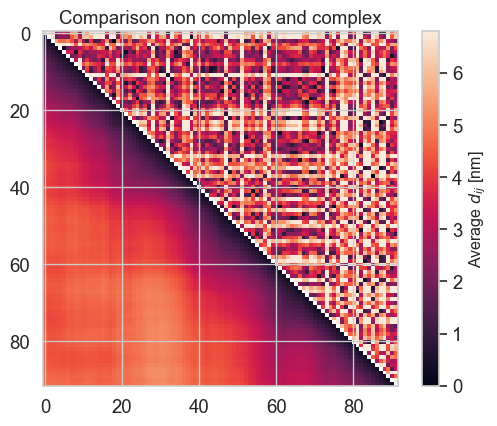

In [65]:
plot_average_dmap_comparison(distance_matrix_dict['PED00001e001'],distance_matrix_dict['PED00014e001'][np.random.choice(15, 11, replace=False)][:, np.random.choice(663, 92, replace=False)][:, :, np.random.choice(663, 92, replace=False)],'Comparison non complex and complex')

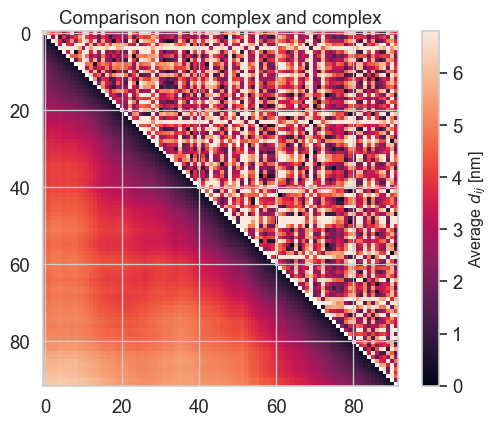

In [66]:
plot_average_dmap_comparison(distance_matrix_dict['PED00001e003'],distance_matrix_dict['PED00014e003'][np.random.choice(14, 11, replace=False)][:, np.random.choice(663, 92, replace=False)][:, :, np.random.choice(663, 92, replace=False)],'Comparison non complex and complex')

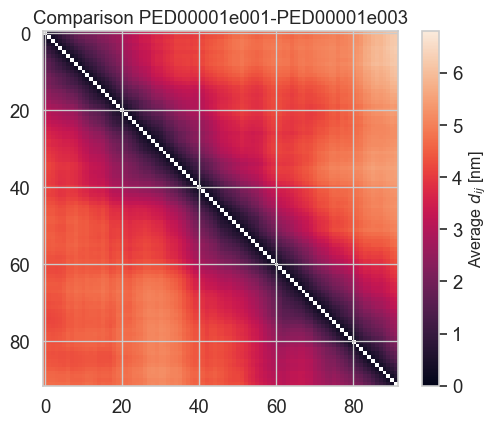

In [74]:
plot_average_dmap_comparison(distance_matrix_dict['PED00001e001'],distance_matrix_dict['PED00001e003'],'Comparison PED00001e001-PED00001e003')

### Contact map

In [67]:
contact_map_dict=get_contact_map_dict(distance_matrix_dict)
contact_map_dict['PED00001e003'].shape

(92, 92)

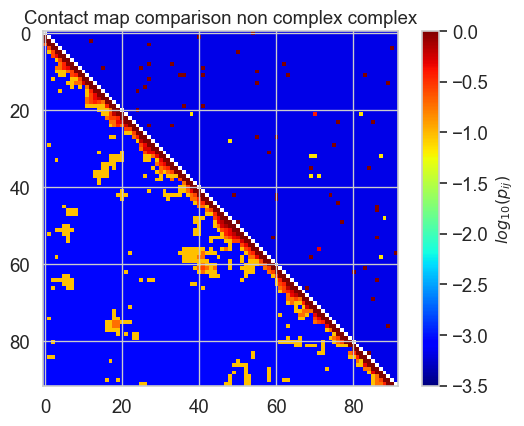

In [68]:
plot_cmap_comparison(contact_map_dict['PED00001e001'],contact_map_dict['PED00014e001'][ np.random.choice(663, 92, replace=False)][:,  np.random.choice(663, 92, replace=False)],'Contact map comparison non complex complex')

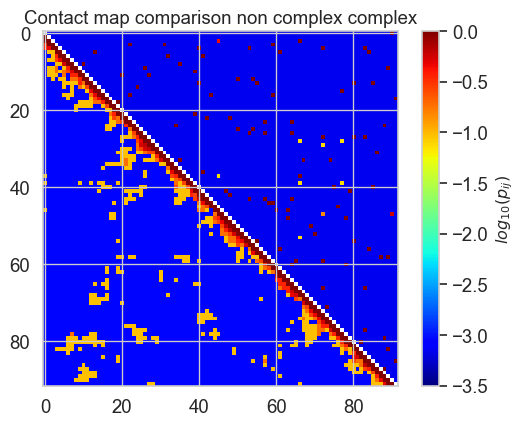

In [71]:
plot_cmap_comparison(contact_map_dict['PED00001e003'],contact_map_dict['PED00014e003'][ np.random.choice(663, 92, replace=False)][:,  np.random.choice(663, 92, replace=False)],'Contact map comparison non complex complex')

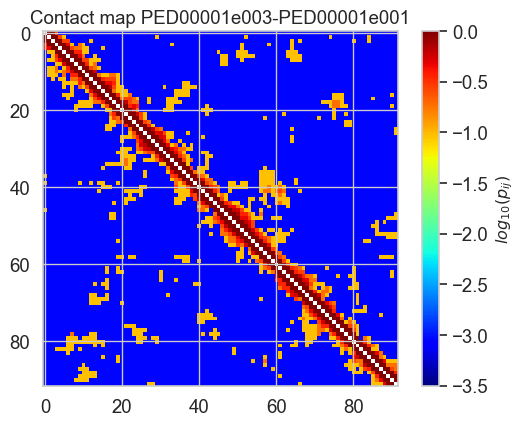

In [73]:
plot_cmap_comparison(contact_map_dict['PED00001e003'],contact_map_dict['PED00001e001'],'Contact map PED00001e003-PED00001e001')

### Distribution

In [41]:
flattened_dict=flatten_matrices(distance_matrix_dict)
flattened_dict

{'PED00001e001': array([0.        , 0.37962544, 0.64211255, ..., 0.6506941 , 0.38560542,
        0.        ], dtype=float32),
 'PED00001e002': array([0.        , 0.37968054, 0.60527617, ..., 0.53648424, 0.38024774,
        0.        ], dtype=float32),
 'PED00001e003': array([0.        , 0.37970006, 0.6238094 , ..., 0.68406296, 0.38094038,
        0.        ], dtype=float32),
 'PED00014e001': array([0.        , 0.3797413 , 0.72639865, ..., 0.5823975 , 0.3846518 ,
        0.        ], dtype=float32),
 'PED00014e003': array([0.        , 0.37977794, 0.64220107, ..., 0.5823975 , 0.3846518 ,
        0.        ], dtype=float32)}

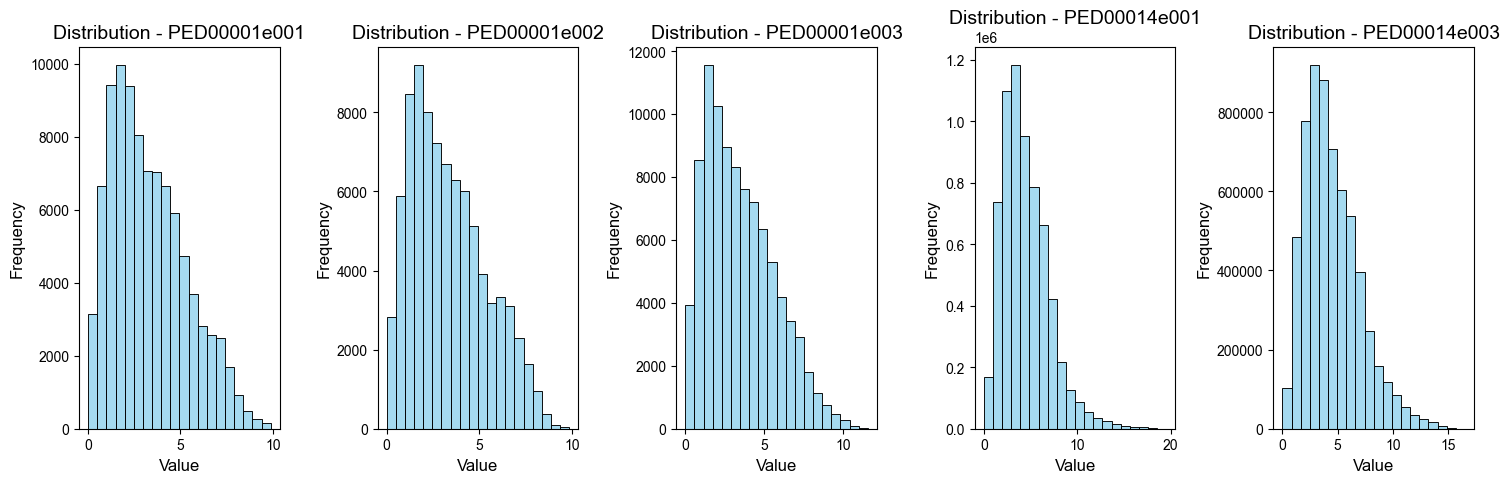

In [42]:
plot_flattened_data(flattened_dict)

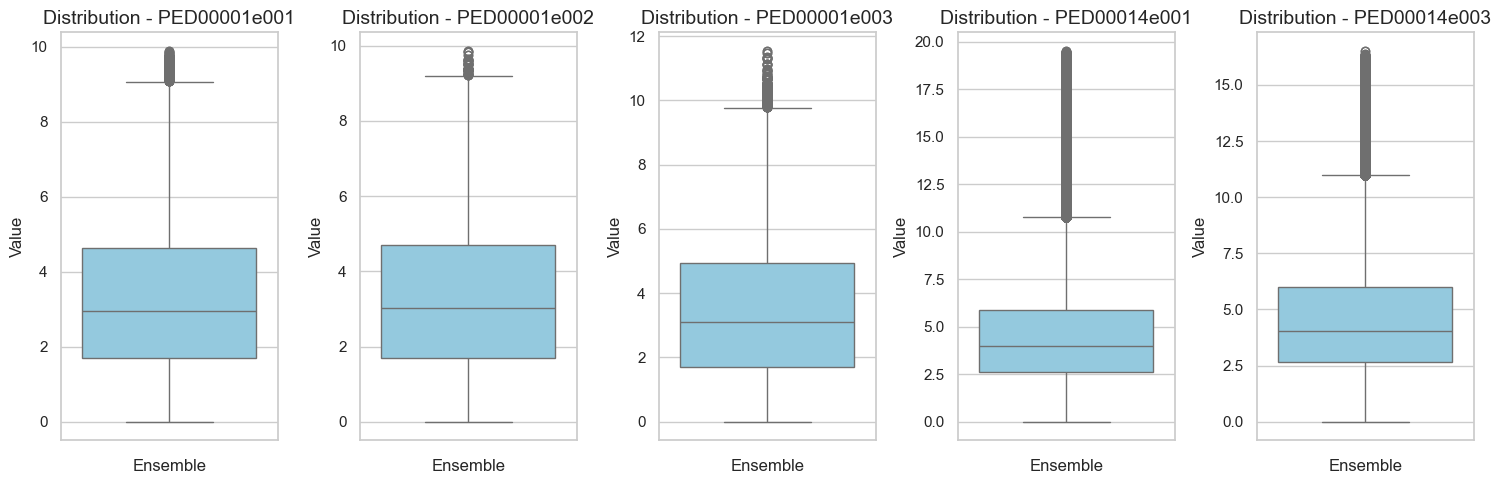

In [43]:
plot_boxplot(flattened_dict)

### Site chain center of mass

In [44]:
#Codes of the ensembles we want to analyze,corresponding PDB files.
ens_codes = ['PED00001e001','PED00001e002','PED00001e003','PED00014e001','PED00014e003']
  
# Directory with the PDB files.
pdb_dp = "/Users/giuliabartocci/Desktop/AA/EXAMPLE/SIC1"

# Featurization options.
featurization = "sc_center_of_mass_dist"  # choices: "ca_dist", "phi_psi", "sc_center_of_mass_dist" 
featurization_params = {"ca_dist": {"seq_sep": 2, "normalize": True},
                        "phi_psi": {},
                        "a_angle": {},
                        "sc_center_of_mass_dist":{}}

In [45]:
traj=pipeline.trajectories
traj

{'PED00001e001': <mdtraj.Trajectory with 11 frames, 1392 atoms, 92 residues, without unitcells at 0x137e342c0>,
 'PED00001e002': <mdtraj.Trajectory with 10 frames, 1392 atoms, 92 residues, without unitcells at 0x137c240e0>,
 'PED00001e003': <mdtraj.Trajectory with 11 frames, 1392 atoms, 92 residues, without unitcells at 0x139f83f80>,
 'PED00014e001': <mdtraj.Trajectory with 15 frames, 6032 atoms, 666 residues, without unitcells at 0x138244890>,
 'PED00014e003': <mdtraj.Trajectory with 14 frames, 6032 atoms, 666 residues, without unitcells at 0x139f83c80>}

In [46]:
side_center_mass= compute_side_center_mass_dict(traj)
side_center_mass

{'PED00001e001': array([[[ 1.40660002, -0.34098001, -0.36146001],
         [ 1.19626002, -0.71464002, -0.12562   ],
         [ 1.53255457, -0.42939091,  0.22312727],
         ...,
         [ 0.89183128, -0.3916875 , -0.67385625],
         [ 0.29637778, -0.85479446, -1.24889444],
         [-0.12386667, -0.48984445, -0.88070001]],
 
        [[ 1.73080008,  1.09787999, -1.13341999],
         [ 1.67147999,  1.30046   , -0.61516   ],
         [ 1.26093641,  0.94224546, -0.43502728],
         ...,
         [ 2.59600629, -1.44093126, -1.01769376],
         [ 2.15788897, -0.5967    , -1.11273888],
         [ 2.22634451, -1.00130004, -1.59235561]],
 
        [[ 2.85658002,  0.28154001, -2.99506006],
         [ 2.95482001,  0.42128001, -2.44118004],
         [ 3.50572727, -0.09131819, -2.43120913],
         ...,
         [ 0.31933751, -0.60746875, -0.090975  ],
         [-0.11095   , -1.47700002,  0.36174445],
         [-0.38983335, -0.88196666, -0.11508889]],
 
        ...,
 
        [[-2.49028

### Distance matrix and visualization 

In [48]:
distance_matrix_side_center_mass_dict=calculate_distance_matrix_dict(side_center_mass)

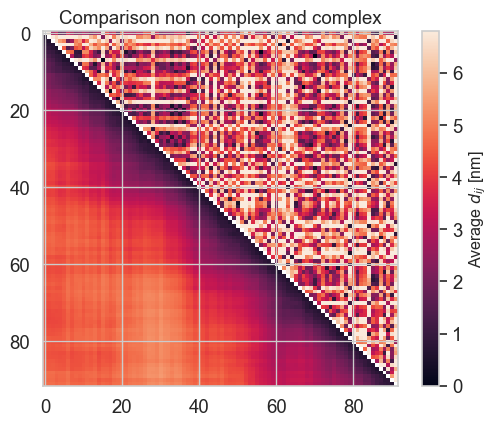

In [49]:
plot_average_dmap_comparison(distance_matrix_side_center_mass_dict['PED00001e001'],distance_matrix_side_center_mass_dict['PED00014e001'][np.random.choice(15, 11, replace=False)][:, np.random.choice(663, 92, replace=False)][:, :, np.random.choice(663, 92, replace=False)],'Comparison non complex and complex')

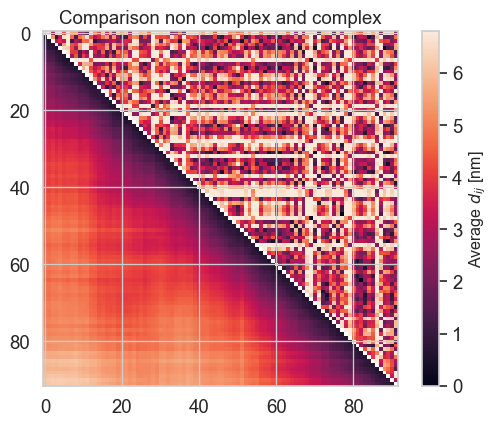

In [51]:
plot_average_dmap_comparison(distance_matrix_side_center_mass_dict['PED00001e003'],distance_matrix_side_center_mass_dict['PED00014e003'][np.random.choice(14, 11, replace=False)][:, np.random.choice(663, 92, replace=False)][:, :, np.random.choice(663, 92, replace=False)],'Comparison non complex and complex')

### Contact map and visualizations

In [53]:
contact_map_side_chain_dict=get_contact_map_dict(distance_matrix_side_center_mass_dict)

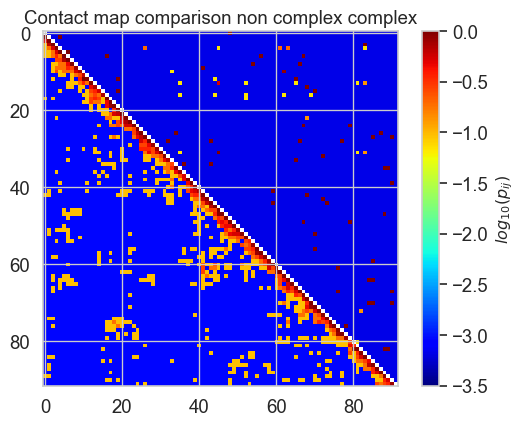

In [54]:
plot_cmap_comparison(contact_map_side_chain_dict['PED00001e001'],contact_map_side_chain_dict['PED00014e001'][ np.random.choice(663, 92, replace=False)][:,  np.random.choice(663, 92, replace=False)],'Contact map comparison non complex complex')

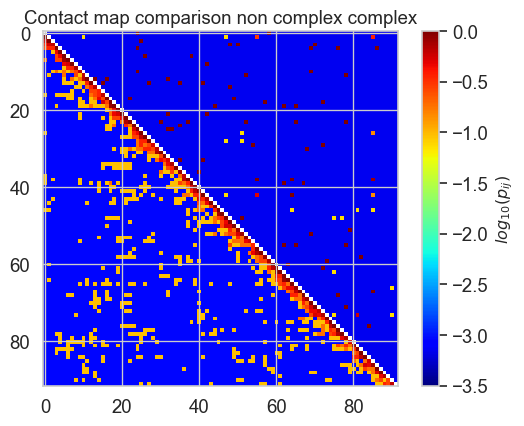

In [55]:
plot_cmap_comparison(contact_map_side_chain_dict['PED00001e003'],contact_map_side_chain_dict['PED00014e003'][ np.random.choice(663, 92, replace=False)][:,  np.random.choice(663, 92, replace=False)],'Contact map comparison non complex complex')

### Distribution

In [56]:
flattened_side_chain_mass_dict=flatten_matrices(distance_matrix_side_center_mass_dict)
flattened_side_chain_mass_dict

{'PED00001e001': array([0.        , 0.48937228, 0.60450254, ..., 0.60539708, 0.74228718,
        0.        ]),
 'PED00001e002': array([0.        , 0.49964117, 0.64428519, ..., 0.7574991 , 0.7087469 ,
        0.        ]),
 'PED00001e003': array([0.        , 0.50363455, 0.79176221, ..., 1.17306002, 0.74071199,
        0.        ]),
 'PED00014e001': array([0.        , 0.5128369 , 0.95946959, ..., 0.50455203, 0.81764484,
        0.        ]),
 'PED00014e003': array([0.        , 0.589976  , 0.61810836, ..., 0.50455203, 0.81764484,
        0.        ])}

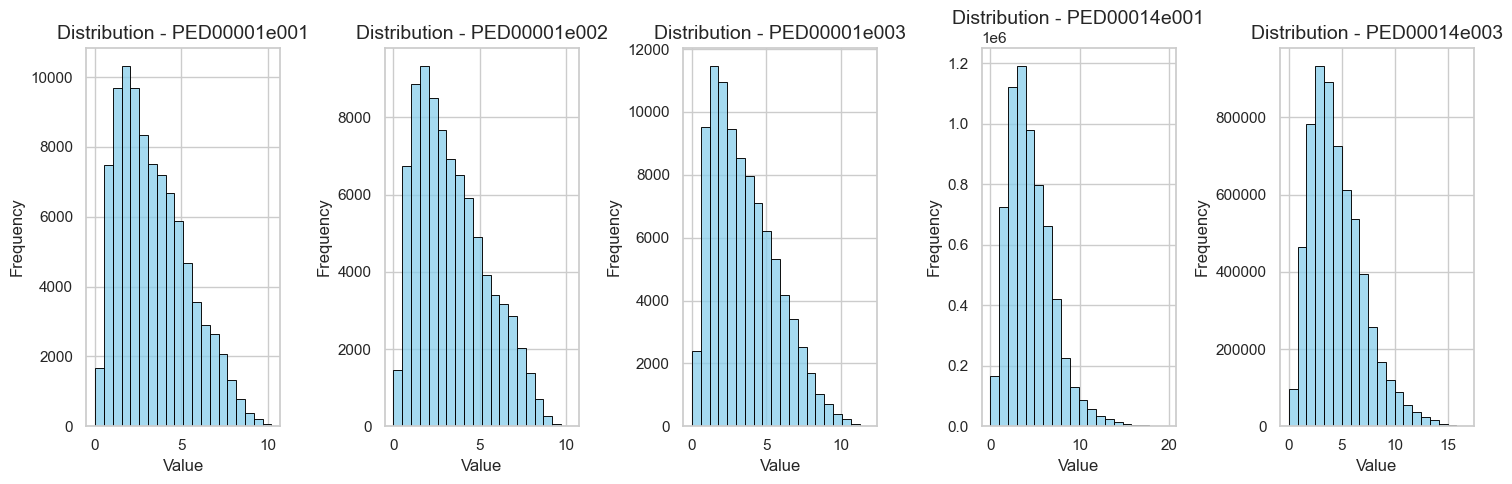

In [57]:
plot_flattened_data(flattened_side_chain_mass_dict)

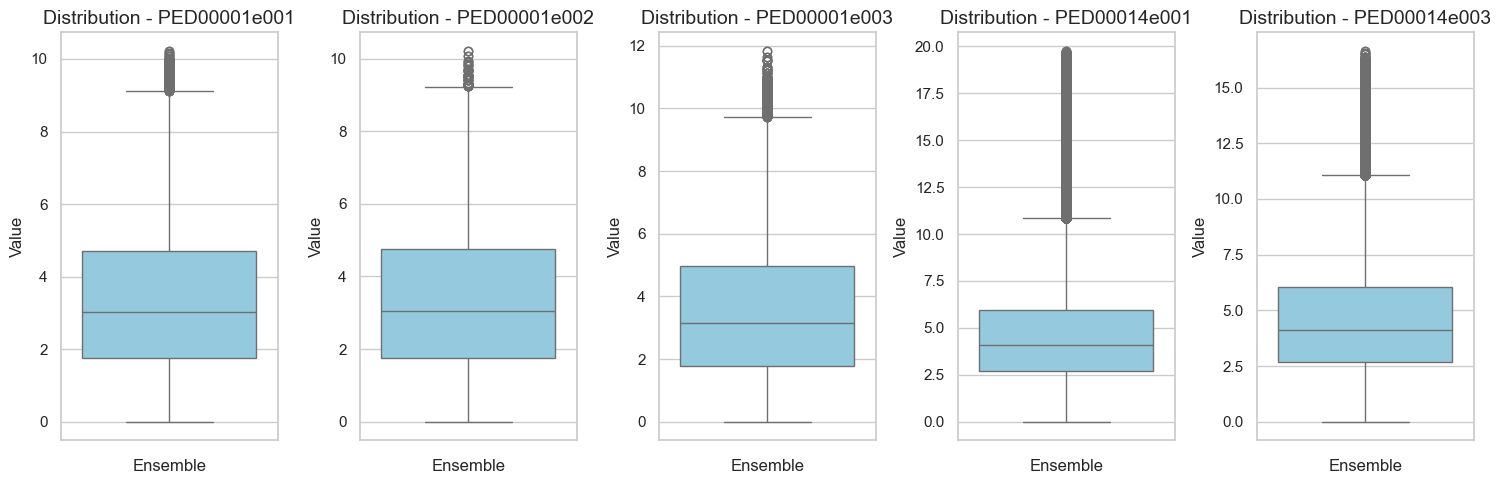

In [58]:
plot_boxplot(flattened_side_chain_mass_dict)

# Angles analysis-Phi and Psi angles

In [2]:
#Codes of the ensembles we want to analyze,corresponding PDB files.
ens_codes = ['PED00001e001','PED00001e002','PED00001e003','PED00014e001','PED00014e003']
  
# Directory with the PDB files.
pdb_dp = "/Users/giuliabartocci/Desktop/AA/EXAMPLE/SIC1"

# Featurization options.
featurization = "phi_psi"  # choices: "ca_dist", "phi_psi", "sc_center_of_mass_dist" 
featurization_params = {"ca_dist": {"seq_sep": 2, "normalize": True},
                        "phi_psi": {},
                        "a_angle": {},
                        "sc_center_of_mass_dist":{}}

In [3]:
pipeline = EnsembleAnalysis(pdb_dp=pdb_dp,
                            ens_codes=ens_codes)

# Loading /Users/giuliabartocci/Desktop/AA/EXAMPLE/SIC1/PED00001e001.dcd.
- Found 11 conformations.
# Loading /Users/giuliabartocci/Desktop/AA/EXAMPLE/SIC1/PED00001e002.dcd.
- Found 10 conformations.
# Loading /Users/giuliabartocci/Desktop/AA/EXAMPLE/SIC1/PED00001e003.dcd.
- Found 11 conformations.
# Loading /Users/giuliabartocci/Desktop/AA/EXAMPLE/SIC1/PED00014e001.dcd.
- Found 15 conformations.
# Loading /Users/giuliabartocci/Desktop/AA/EXAMPLE/SIC1/PED00014e003.dcd.
- Found 14 conformations.


In [4]:
trajectories_angles= pipeline.trajectories
trajectories_angles

{'PED00001e001': <mdtraj.Trajectory with 11 frames, 1392 atoms, 92 residues, without unitcells at 0x10375c7d0>,
 'PED00001e002': <mdtraj.Trajectory with 10 frames, 1392 atoms, 92 residues, without unitcells at 0x1287f2ae0>,
 'PED00001e003': <mdtraj.Trajectory with 11 frames, 1392 atoms, 92 residues, without unitcells at 0x128adb050>,
 'PED00014e001': <mdtraj.Trajectory with 15 frames, 6032 atoms, 666 residues, without unitcells at 0x1285a2030>,
 'PED00014e003': <mdtraj.Trajectory with 14 frames, 6032 atoms, 666 residues, without unitcells at 0x1295b3e60>}

In [5]:
dict_phi_psi_splitted=featurize_and_split_phi_psi(trajectories_angles)

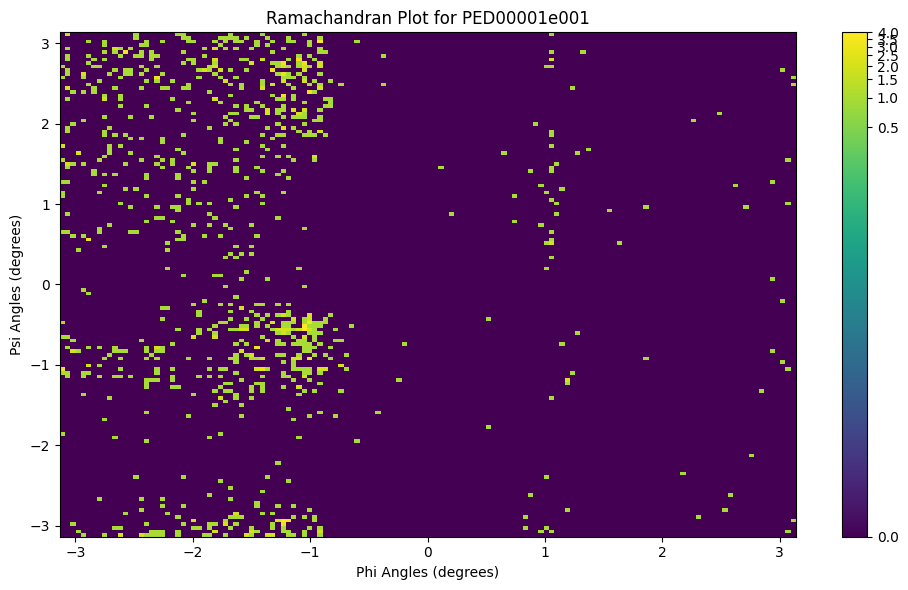

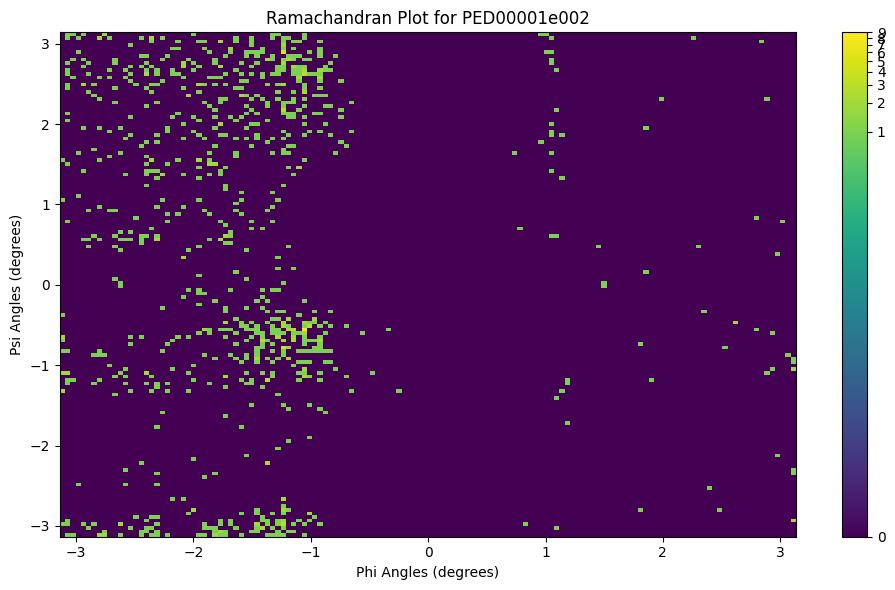

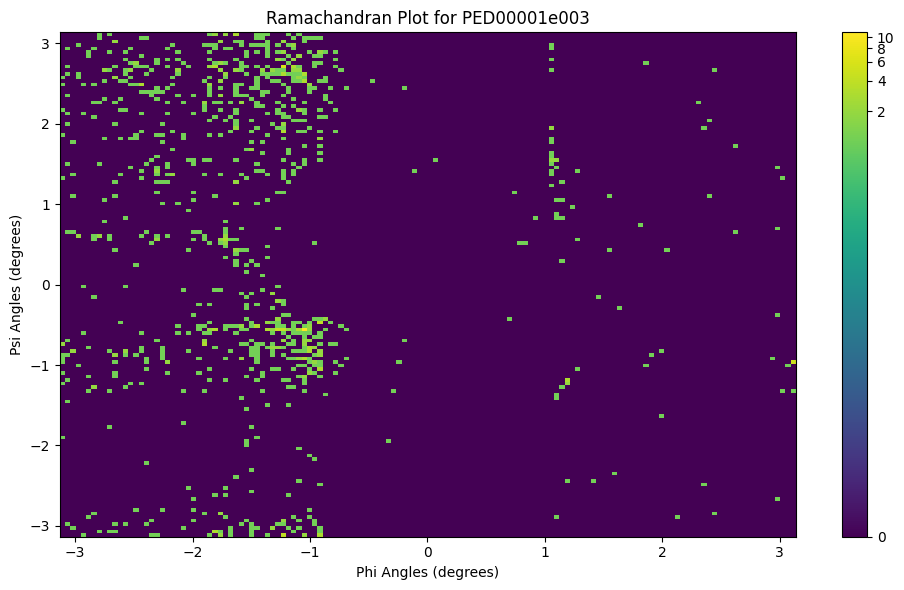

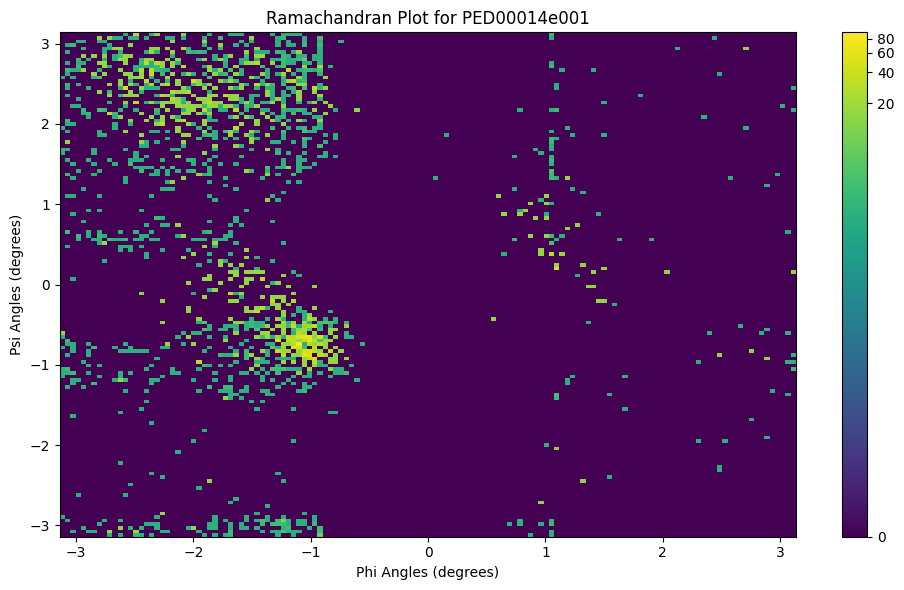

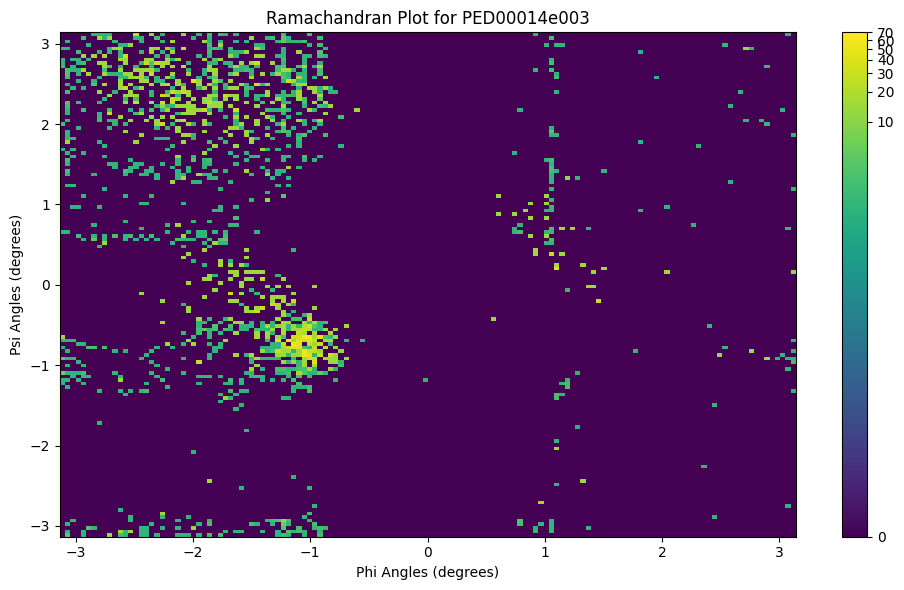

In [6]:
Ramachandran_plot_phi_psi(dict_phi_psi_splitted)

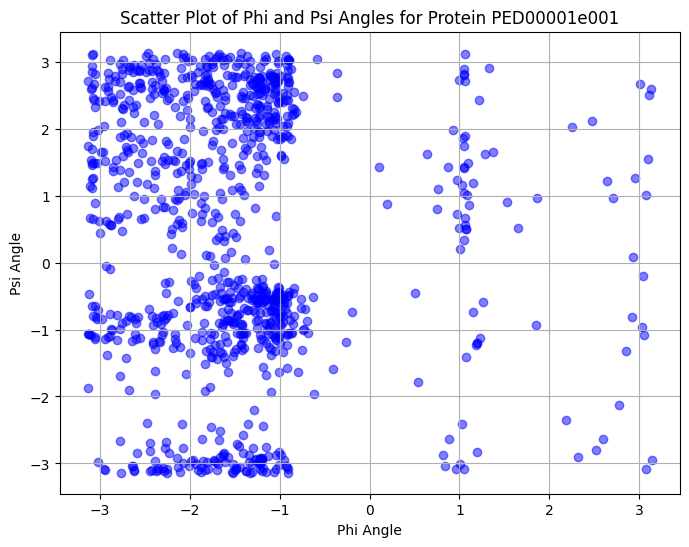

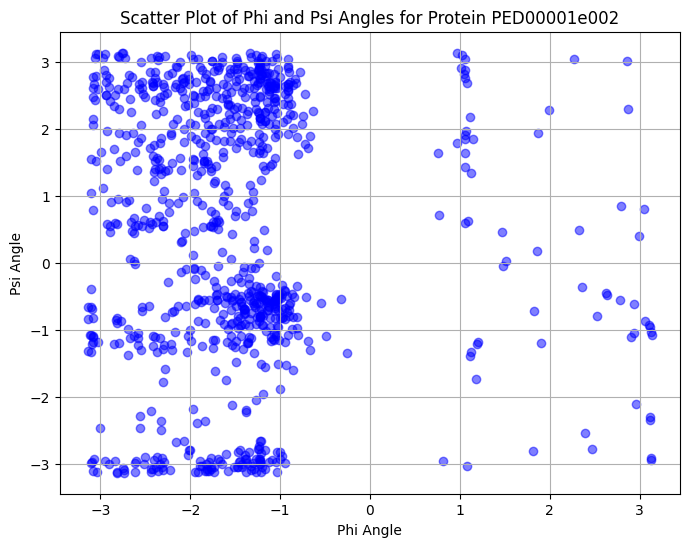

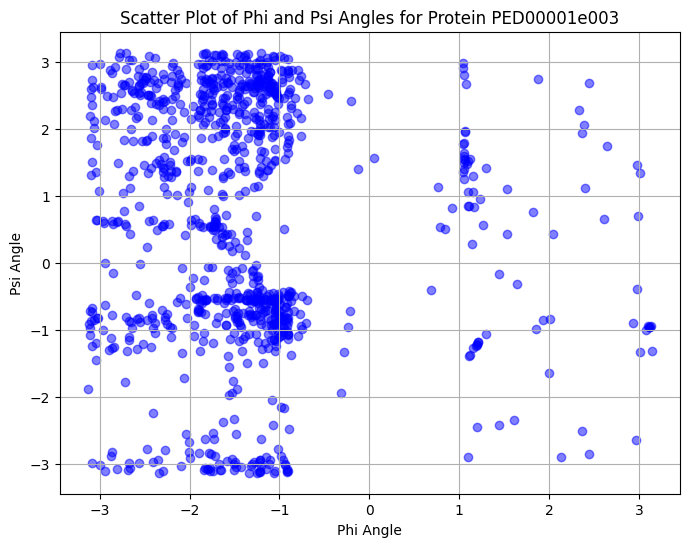

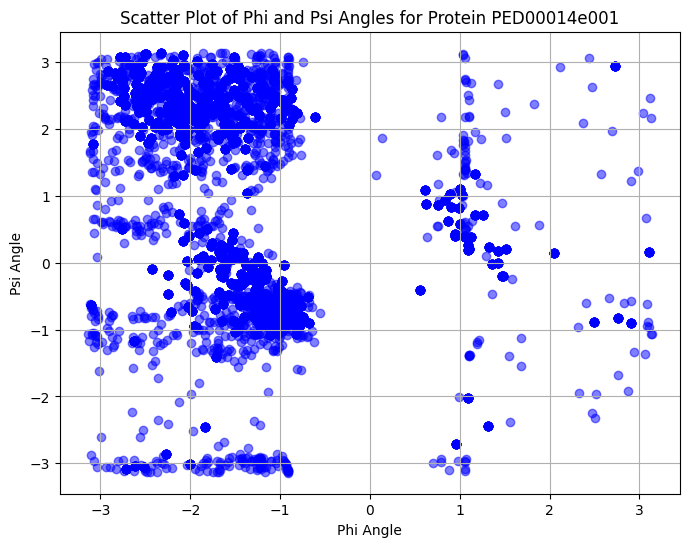

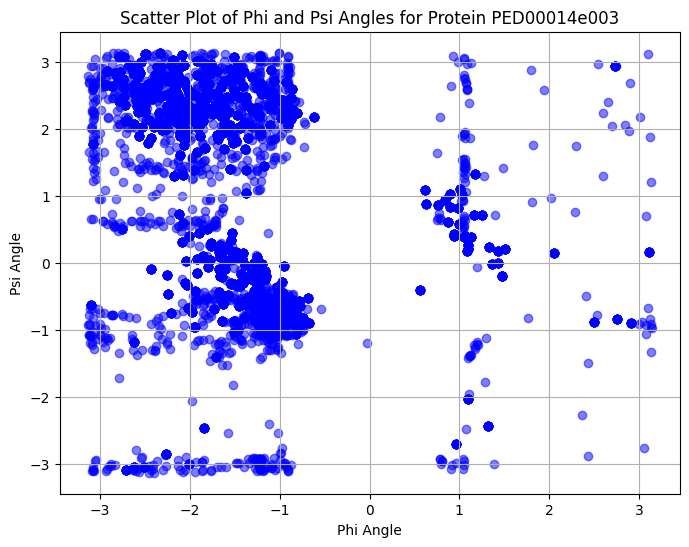

In [7]:
scatter_plot_phi_psi(dict_phi_psi_splitted)

In [8]:
four_consecutive_indices_Calpha=consecutive_4_indices_of_Calpha(trajectories_angles)

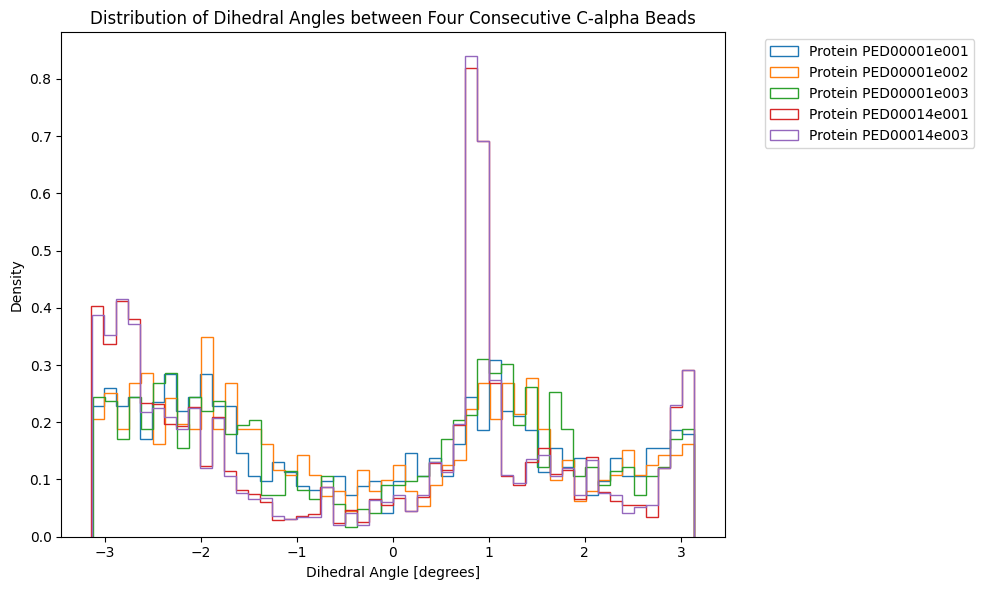

In [9]:
plot_distribution_dihedral_angles(trajectories_angles,four_consecutive_indices_Calpha)

## Global analysis
### Radius-of-gyration

In [2]:
#Codes of the ensembles we want to analyze,corresponding PDB files.
ens_codes = ['PED00001e001','PED00001e002','PED00001e003','PED00014e001','PED00014e003']
  
# Directory with the PDB files.
pdb_dp = "/Users/giuliabartocci/Desktop/AA/EXAMPLE/SIC1"

# Featurization options.
featurization = "ca_dist"  # choices: "ca_dist", "phi_psi", "sc_center_of_mass_dist" 
featurization_params = {"ca_dist": {"seq_sep": 2, "normalize": True},
                        "phi_psi": {},
                        "a_angle": {},
                        "sc_center_of_mass_dist":{}}
pipeline = EnsembleAnalysis(pdb_dp=pdb_dp,
                            ens_codes=ens_codes)

# Loading /Users/giuliabartocci/Desktop/AA/EXAMPLE/SIC1/PED00001e001.dcd.
- Found 11 conformations.
# Loading /Users/giuliabartocci/Desktop/AA/EXAMPLE/SIC1/PED00001e002.dcd.
- Found 10 conformations.
# Loading /Users/giuliabartocci/Desktop/AA/EXAMPLE/SIC1/PED00001e003.dcd.
- Found 11 conformations.
# Loading /Users/giuliabartocci/Desktop/AA/EXAMPLE/SIC1/PED00014e001.dcd.
- Found 15 conformations.
# Loading /Users/giuliabartocci/Desktop/AA/EXAMPLE/SIC1/PED00014e003.dcd.
- Found 14 conformations.


In [3]:
trajectories= pipeline.trajectories
Rgs_dict=rg_calculator_dict(trajectories)

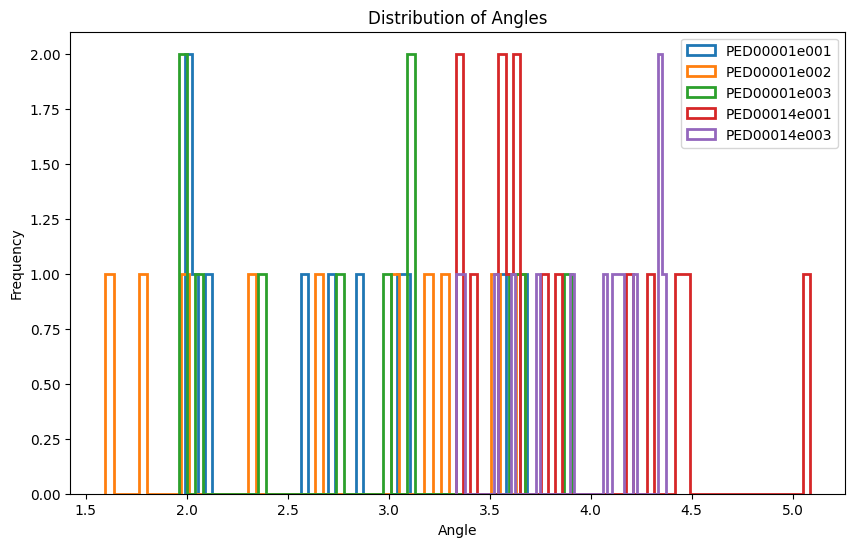

In [6]:
plot_distribution_of_Rgs(Rgs_dict)

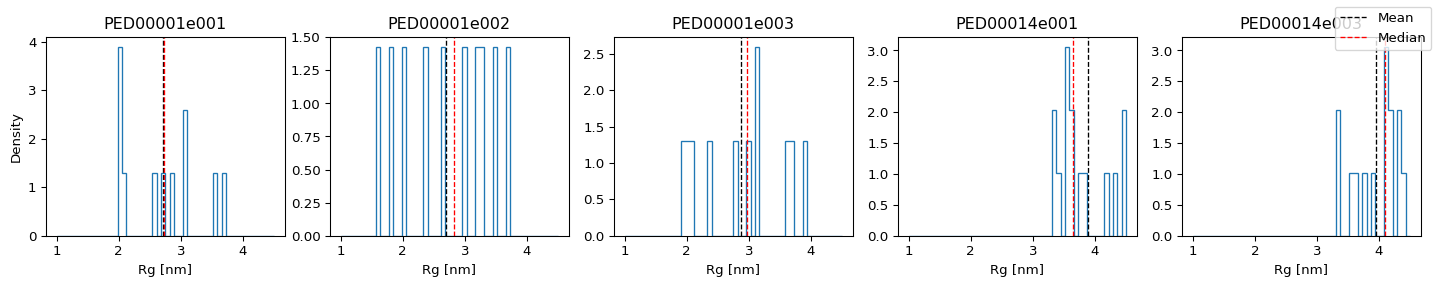

In [7]:
plot_rg_comparison(Rgs_dict)

### Alpha-helix content

In [8]:
dssp_dict=get_dssp_dict(trajectories)

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (666,) and arg 3 with shape (92,).

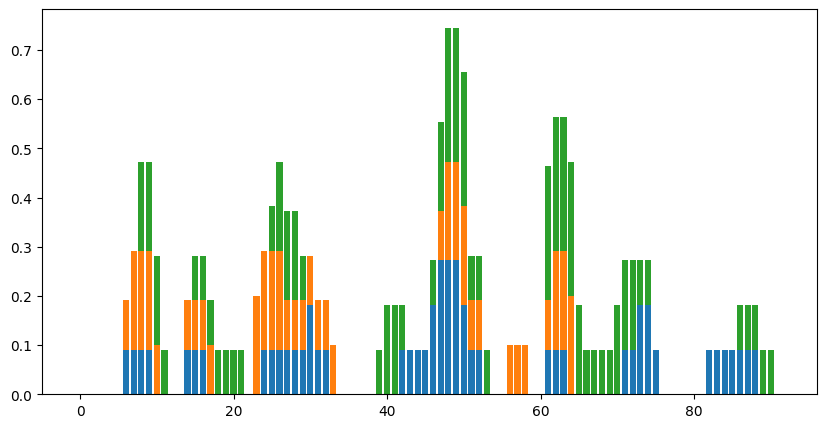

In [9]:
plot_relative_helix_content_multiple_proteins(dssp_dict)

### Asphericity

In [10]:
gyration_tensors_dict=get_gyration_tensors_dict(trajectories)
asphericity_dict=calculate_asphericity_dict(gyration_tensors_dict)

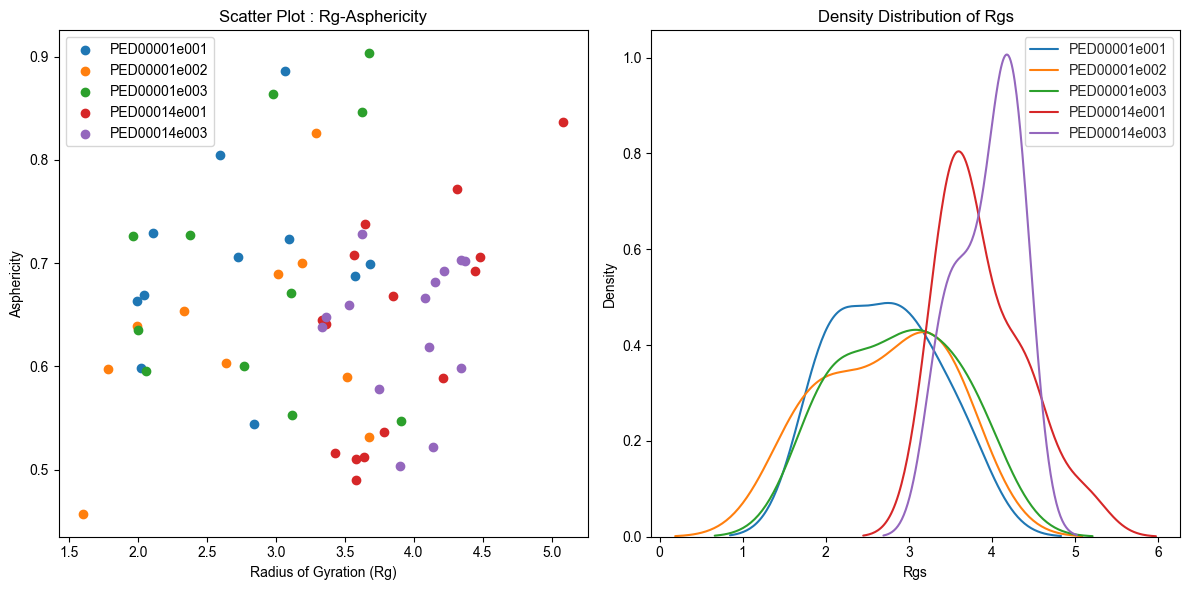

In [11]:
scatterplot_rg_asphericity(Rgs_dict,asphericity_dict)

## Prolateness

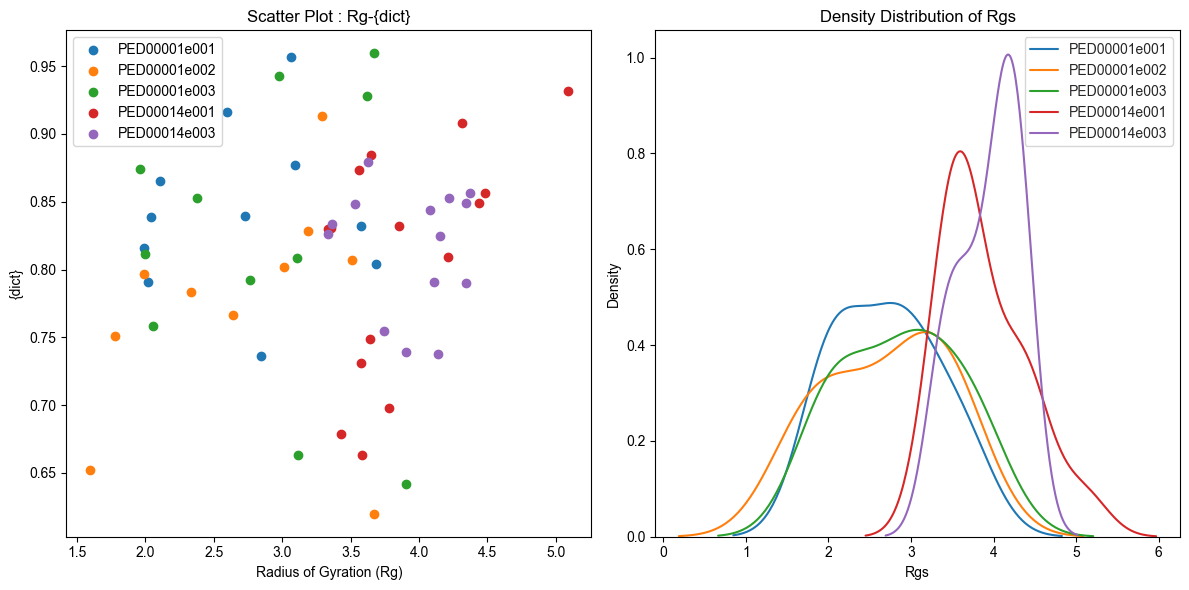

In [4]:
gyration_tensors_dict=get_gyration_tensors_dict(trajectories)
prolateness_dict=calculate_prolateness_dict(gyration_tensors_dict)
scatterplot_rg_asphericity(Rgs_dict,prolateness_dict)

## End-to-End distance

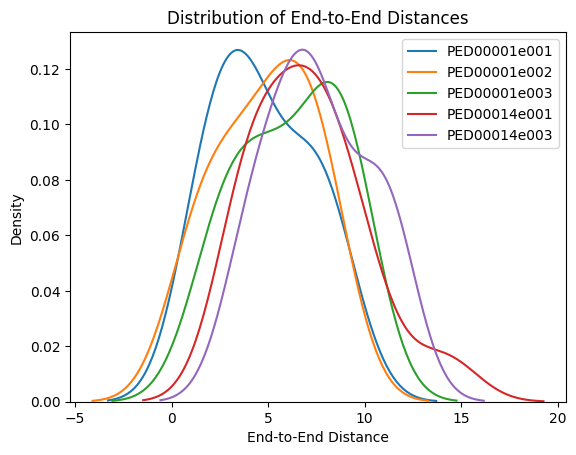

In [5]:
calculate_and_plot_end_to_end_distance(trajectories)